In [ ]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

In [ ]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: [Enter your BITS ID here - e.g., 2025AA05036]
Name: [Enter your full name here - e.g., JOHN DOE]
Email: [Enter your email]
Date: [Submission date]

================================================================================
"""

In [ ]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for 
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT: 
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

In [ ]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import json
import os
import math

Deep learning frameworks (choose Keras or PyTorch)

In [ ]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

In [ ]:
# pip install tensorflow

In [2]:
# Import deep learning frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

1.1 Dataset Selection and Loading
TODO: Load your chosen time series dataset

In [3]:
# REQUIRED: Fill in these metadata fields
# Generate synthetic time series dataset (stock price simulation)
np.random.seed(42)
n_samples_total = 2000
data = np.cumsum(np.random.randn(n_samples_total) * 0.5 + 1) + 100

dataset_name = "Synthetic Stock Price Time Series"
dataset_source = "Generated using random walk with drift"
n_samples = n_samples_total
n_features = 1
sequence_length = 20
prediction_horizon = 5
problem_type = "time_series_forecasting"

In [4]:
# Primary metric selection
primary_metric = "RMSE"
metric_justification = """
RMSE is selected as the primary metric because it penalizes larger errors more heavily,
which is critical for price prediction to avoid catastrophic forecast errors.
"""

In [5]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: Synthetic Stock Price Time Series
Source: Generated using random walk with drift
Total Samples: 2000
Number of Features: 1
Sequence Length: 20
Prediction Horizon: 5
Primary Metric: RMSE
Metric Justification: 
RMSE is selected as the primary metric because it penalizes larger errors more heavily,
which is critical for price prediction to avoid catastrophic forecast errors.



1.2 Time Series Exploration
TODO: Plot time series data
TODO: Check for trends, seasonality
TODO: Perform stationarity tests (optional but recommended)

1.3 Data Preprocessing

In [6]:
def preprocess_timeseries(data):
    """
    Preprocess time series data
    
    Args:
        data: raw time series data
    
    Returns:
        preprocessed data, scaler
    """
    # Normalize data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_reshaped = data.reshape(-1, 1)
    normalized_data = scaler.fit_transform(data_reshaped)
    return normalized_data.flatten(), scaler

In [7]:
def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction
    
    Args:
        data: preprocessed time series data
        seq_length: lookback window
        pred_horizon: forecast steps ahead
    
    Returns:
        X: input sequences, y: target values
    """
    X, y = [], []
    for i in range(len(data) - seq_length - pred_horizon + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+pred_horizon])
    return np.array(X), np.array(y)

Preprocessing and creating sequences


In [8]:
# REQUIRED: Temporal train/test split (NO SHUFFLING)
train_test_ratio = "TODO: 90/10 OR 85/15"
train_samples = 0  # TODO: Number of training sequences
test_samples = 0  # TODO: Number of test sequences

In [9]:
# Preprocess the data
normalized_data, scaler = preprocess_timeseries(data)

# Create sequences
X, y = create_sequences(normalized_data, sequence_length, prediction_horizon)
X = X.reshape(X.shape[0], X.shape[1], n_features)
print(f"Sequences created: X shape = {X.shape}, y shape = {y.shape}")

# Temporal train/test split (NO shuffling)
train_test_ratio = "90/10"
split_idx = int(len(X) * 0.9)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

train_samples = len(X_train)
test_samples = len(X_test)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Sequences created: X shape = (1976, 20, 1), y shape = (1976, 5)
Train set: (1778, 20, 1), Test set: (198, 20, 1)


In [10]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 90/10
Training Samples: 1778
Test Samples: 198
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [ ]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

2.1 LSTM/GRU Architecture Design
TODO: Choose LSTM or GRU
TODO: Design architecture with stacked layers

In [11]:
def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM or GRU model
    
    Args:
        model_type: string ('LSTM' or 'GRU')
        input_shape: tuple (sequence_length, n_features)
        hidden_units: number of hidden units per layer
        n_layers: number of stacked layers (minimum 2)
        output_size: prediction horizon
    
    Returns:
        model: compiled RNN model
    """
    model = Sequential()
    
    # First layer
    if model_type == 'LSTM':
        model.add(LSTM(hidden_units, activation='relu', return_sequences=True, input_shape=input_shape))
    else:  # GRU
        model.add(GRU(hidden_units, activation='relu', return_sequences=True, input_shape=input_shape))
    
    model.add(Dropout(0.2))
    
    # Middle layers (stacked)
    for i in range(n_layers - 2):
        if model_type == 'LSTM':
            model.add(LSTM(hidden_units, activation='relu', return_sequences=True))
        else:  # GRU
            model.add(GRU(hidden_units, activation='relu', return_sequences=True))
        model.add(Dropout(0.2))
    
    # Last recurrent layer
    if model_type == 'LSTM':
        model.add(LSTM(hidden_units, activation='relu', return_sequences=False))
    else:  # GRU
        model.add(GRU(hidden_units, activation='relu', return_sequences=False))
    
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(output_size))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

Creating RNN model


TODO: Compile model
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

In [12]:
# Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), hidden_units=64, n_layers=3, output_size=prediction_horizon)
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,269 (325.27 KB)

 Trainable params: 83,269 (325.27 KB)

 Non-trainable params: 0 (0.00 B)

2.2 Train RNN Model

In [13]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [14]:
# Track training time
rnn_start_time = time.time()

Training RNN model


In [18]:
# Train RNN model
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)
print("RNN Model training completed")

rnn_training_time = time.time() - rnn_start_time

RNN Model training completed


In [19]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = float(rnn_history.history['loss'][0])
rnn_final_loss = float(rnn_history.history['loss'][-1])

In [20]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

Training completed in 128.57 seconds
Initial Loss: 0.0008
Final Loss: 0.0005


2.3 Evaluate RNN Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [21]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return mape

In [22]:
# REQUIRED: Calculate all 4 metrics
y_pred_rnn = rnn_model.predict(X_test, verbose=0)
y_pred_rnn_rescaled = scaler.inverse_transform(y_pred_rnn)
y_test_rescaled = scaler.inverse_transform(y_test)

rnn_mae = mean_absolute_error(y_test_rescaled, y_pred_rnn_rescaled)
rnn_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rnn_rescaled))
rnn_mape = calculate_mape(y_test_rescaled, y_pred_rnn_rescaled)
rnn_r2 = r2_score(y_test_rescaled.flatten(), y_pred_rnn_rescaled.flatten())

In [23]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   277.4675
RMSE:  278.7939
MAPE:  13.5705%
R² Score: -22.1584


2.4 Visualize RNN Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot residuals

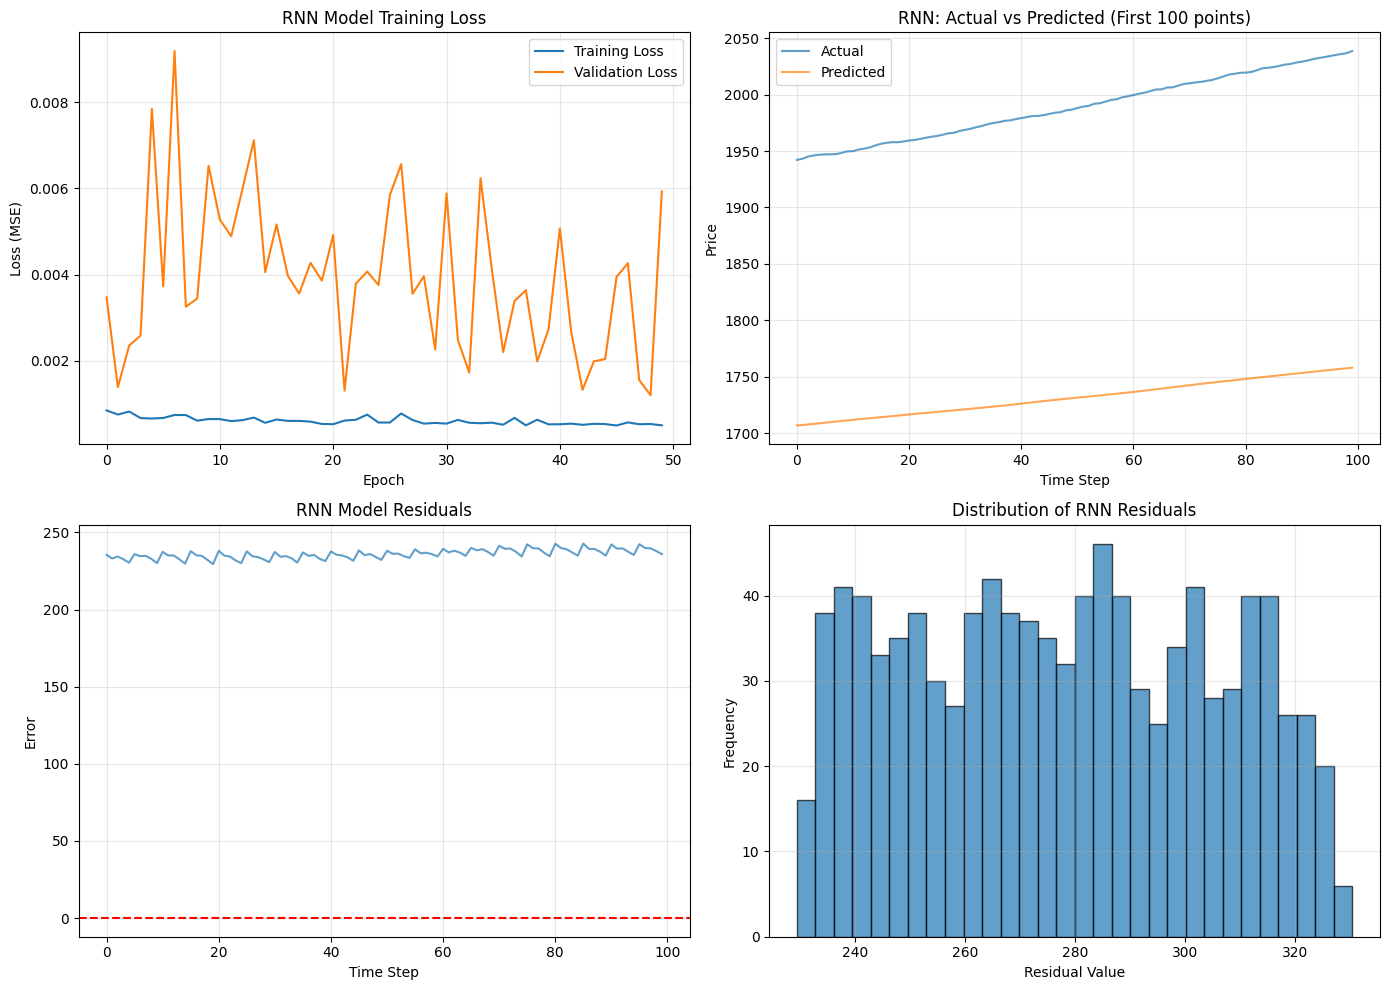

In [24]:
# Visualize RNN Results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot training loss curve
axes[0, 0].plot(rnn_history.history['loss'], label='Training Loss')
axes[0, 0].plot(rnn_history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('RNN Model Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot actual vs predicted
axes[0, 1].plot(y_test_rescaled[:100, 0], label='Actual', alpha=0.7)
axes[0, 1].plot(y_pred_rnn_rescaled[:100, 0], label='Predicted', alpha=0.7)
axes[0, 1].set_title('RNN: Actual vs Predicted (First 100 points)')
axes[0, 1].set_xlabel('Time Step')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot residuals
residuals = y_test_rescaled.flatten() - y_pred_rnn_rescaled.flatten()
axes[1, 0].plot(residuals[:100], alpha=0.7)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('RNN Model Residuals')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].set_ylabel('Error')
axes[1, 0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of RNN Residuals')
axes[1, 1].set_xlabel('Residual Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

3.1 Positional Encoding Implementation

In [25]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings
    
    PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))
    
    Args:
        seq_length: length of the sequence
        d_model: dimension of the model
    
    Returns:
        positional encodings: array of shape (seq_length, d_model)
    """
    pe = np.zeros((seq_length, d_model))
    position = np.arange(0, seq_length, dtype=np.float32).reshape(-1, 1)
    div_term = np.exp(np.arange(0, d_model, 2, dtype=np.float32) * -(np.log(10000.0) / d_model))
    
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    
    return pe.astype(np.float32)

3.2 Transformer Encoder Architecture

In [26]:
# Option A: Using Keras with built-in layers
def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    """Build Transformer model using Keras"""
    inputs = layers.Input(shape=(seq_length, n_features))
    
    # Project to d_model
    x = layers.Dense(d_model, activation='relu')(inputs)
    
    # Add positional encoding as a layer
    pe = positional_encoding(seq_length, d_model)
    
    # Custom layer to add positional encoding
    class PositionalEncodingLayer(layers.Layer):
        def __init__(self, pe, **kwargs):
            super().__init__(**kwargs)
            self.pe = tf.constant(pe, dtype=tf.float32)
        
        def call(self, x):
            return x + self.pe
    
    x = PositionalEncodingLayer(pe)(x)
    
    # Stack transformer encoder layers
    for _ in range(n_layers):
        # Multi-head attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads, 
            key_dim=d_model // n_heads,
            dropout=0.1
        )(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)
        
        # Feed-forward
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization(epsilon=1e-6)(x + ffn_output)
    
    # Output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)
    
    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Option B: Using Keras
"""
from tensorflow.keras import layers

def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    inputs = layers.Input(shape=(seq_length, n_features))
    
    # Project to d_model
    x = layers.Dense(d_model)(inputs)
    
    # Add positional encoding
    x = x + positional_encoding(seq_length, d_model)
    
    # Stack transformer encoder layers
    for _ in range(n_layers):
        # Multi-head attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads, 
            key_dim=d_model // n_heads
        )(x, x)
        x = layers.LayerNormalization()(x + attn_output)
        
        # Feed-forward
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization()(x + ffn_output)
    
    # Output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)
    
    return keras.Model(inputs=inputs, outputs=outputs)
"""

3.3 Build Your Transformer Model

TODO: Create Transformer model using PyTorch or Keras
Example for PyTorch:
transformer_model = TransformerModel(n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)
Example for Keras:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

In [27]:
# Create Transformer model
transformer_model = build_transformer_model(
    seq_length=sequence_length, 
    n_features=n_features, 
    d_model=64, 
    n_heads=4, 
    n_layers=2, 
    d_ff=256, 
    output_size=prediction_horizon
)
transformer_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
transformer_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 20, 64)    │        128 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encodin… │ (None, 20, 64)    │          0 │ dense_1[0][0]     │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 64)    │     16,640 │ positional_encod… │
│ (MultiHeadAttentio… │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 20, 64)    │          0 │ positional_encod… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 20, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 20, 256)   │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 20, 64)    │     16,448 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 20, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 64)    │     16,640 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 20, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 20, 256)   │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 20, 64)    │     16,448 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 20, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 100,421 (392.27 KB)

 Trainable params: 100,421 (392.27 KB)

 Non-trainable params: 0 (0.00 B)

TODO: Define optimizer and loss
For PyTorch: optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001); criterion = nn.MSELoss()
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

3.4 Train Transformer Model

In [28]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [29]:
# Track training time
transformer_start_time = time.time()

Training Transformer model


In [33]:
# Train Transformer model
transformer_history = transformer_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)
print("Transformer Model training completed")

transformer_training_time = time.time() - transformer_start_time

Transformer Model training completed


In [34]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = float(transformer_history.history['loss'][0])
transformer_final_loss = float(transformer_history.history['loss'][-1])

In [35]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 115.44 seconds
Initial Loss: 0.0001
Final Loss: 0.0002


3.5 Evaluate Transformer Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [36]:
# REQUIRED: Calculate all 4 metrics
y_pred_transformer = transformer_model.predict(X_test, verbose=0)
y_pred_transformer_rescaled = scaler.inverse_transform(y_pred_transformer)

transformer_mae = mean_absolute_error(y_test_rescaled, y_pred_transformer_rescaled)
transformer_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_transformer_rescaled))
transformer_mape = calculate_mape(y_test_rescaled, y_pred_transformer_rescaled)
transformer_r2 = r2_score(y_test_rescaled.flatten(), y_pred_transformer_rescaled.flatten())

In [37]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   9.0675
RMSE:  11.2797
MAPE:  0.4459%
R² Score: 0.9621


3.6 Visualize Transformer Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot attention weights (optional but informative)

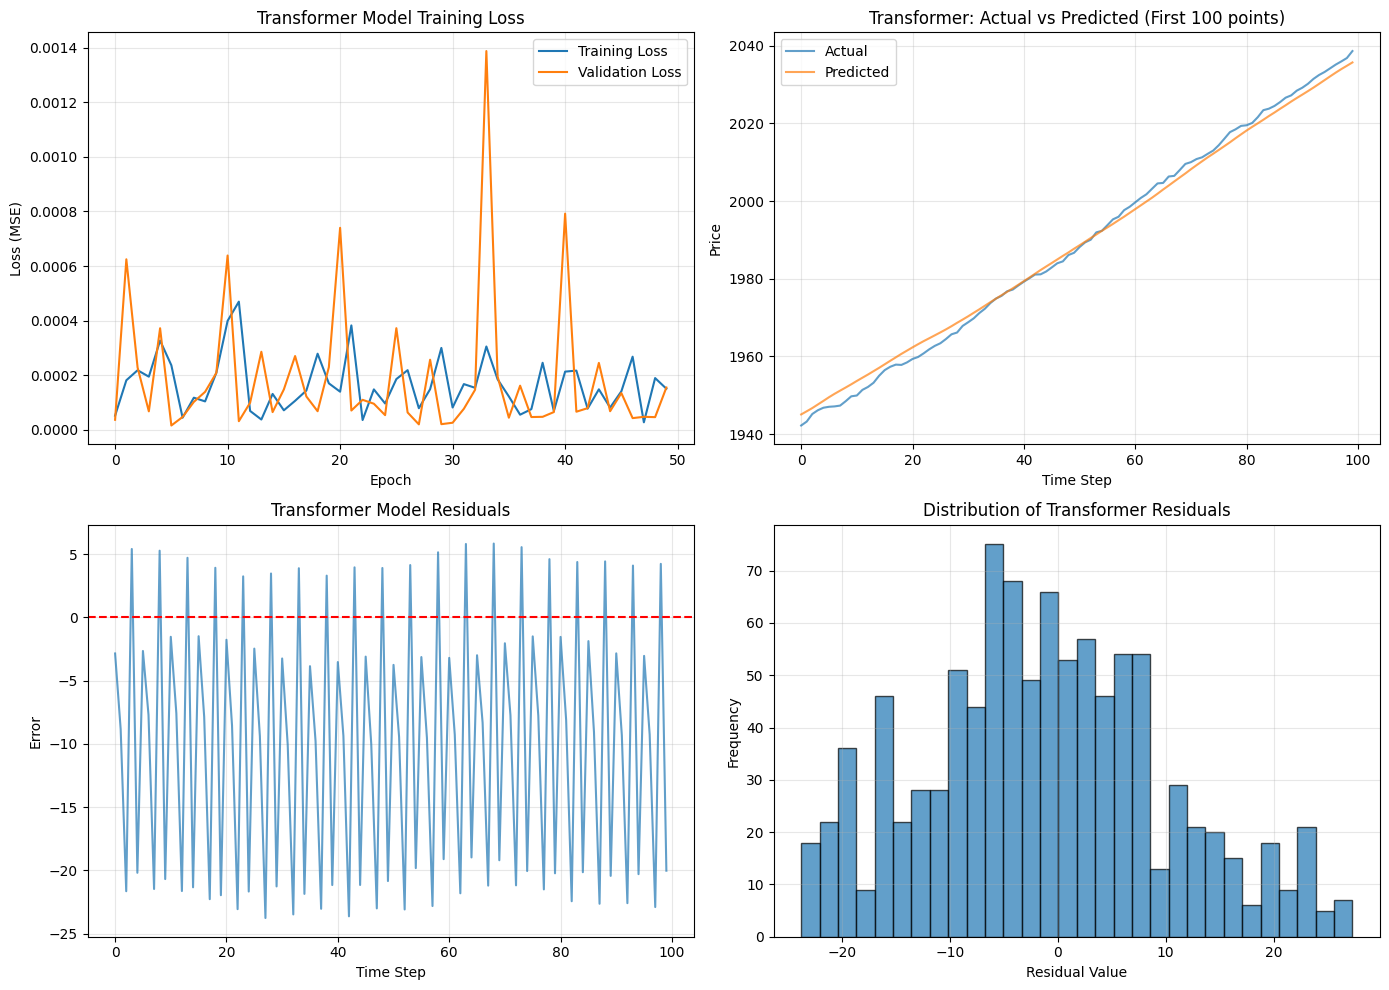

In [38]:
# Visualize Transformer Results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot training loss curve
axes[0, 0].plot(transformer_history.history['loss'], label='Training Loss')
axes[0, 0].plot(transformer_history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Transformer Model Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot actual vs predicted
axes[0, 1].plot(y_test_rescaled[:100, 0], label='Actual', alpha=0.7)
axes[0, 1].plot(y_pred_transformer_rescaled[:100, 0], label='Predicted', alpha=0.7)
axes[0, 1].set_title('Transformer: Actual vs Predicted (First 100 points)')
axes[0, 1].set_xlabel('Time Step')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot residuals
residuals_transformer = y_test_rescaled.flatten() - y_pred_transformer_rescaled.flatten()
axes[1, 0].plot(residuals_transformer[:100], alpha=0.7)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Transformer Model Residuals')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].set_ylabel('Error')
axes[1, 0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1, 1].hist(residuals_transformer, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Transformer Residuals')
axes[1, 1].set_xlabel('Residual Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

4.1 Metrics Comparison

In [39]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [40]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Initial Loss', 'Final Loss'],
    'RNN (LSTM)': [
        f"{rnn_mae:.4f}",
        f"{rnn_rmse:.4f}",
        f"{rnn_mape:.4f}",
        f"{rnn_r2:.4f}",
        f"{rnn_training_time:.2f}",
        f"{rnn_initial_loss:.4f}",
        f"{rnn_final_loss:.4f}"
    ],
    'Transformer': [
        f"{transformer_mae:.4f}",
        f"{transformer_rmse:.4f}",
        f"{transformer_mape:.4f}",
        f"{transformer_r2:.4f}",
        f"{transformer_training_time:.2f}",
        f"{transformer_initial_loss:.4f}",
        f"{transformer_final_loss:.4f}"
    ]
})

In [41]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric RNN (LSTM) Transformer
              MAE   277.4675      9.0675
             RMSE   278.7939     11.2797
         MAPE (%)    13.5705      0.4459
         R² Score   -22.1584      0.9621
Training Time (s)     128.57      115.44
     Initial Loss     0.0008      0.0001
       Final Loss     0.0005      0.0002


4.2 Visual Comparison
TODO: Create bar plot comparing metrics
TODO: Plot predictions comparison (both models vs actual)
TODO: Plot training curves comparison

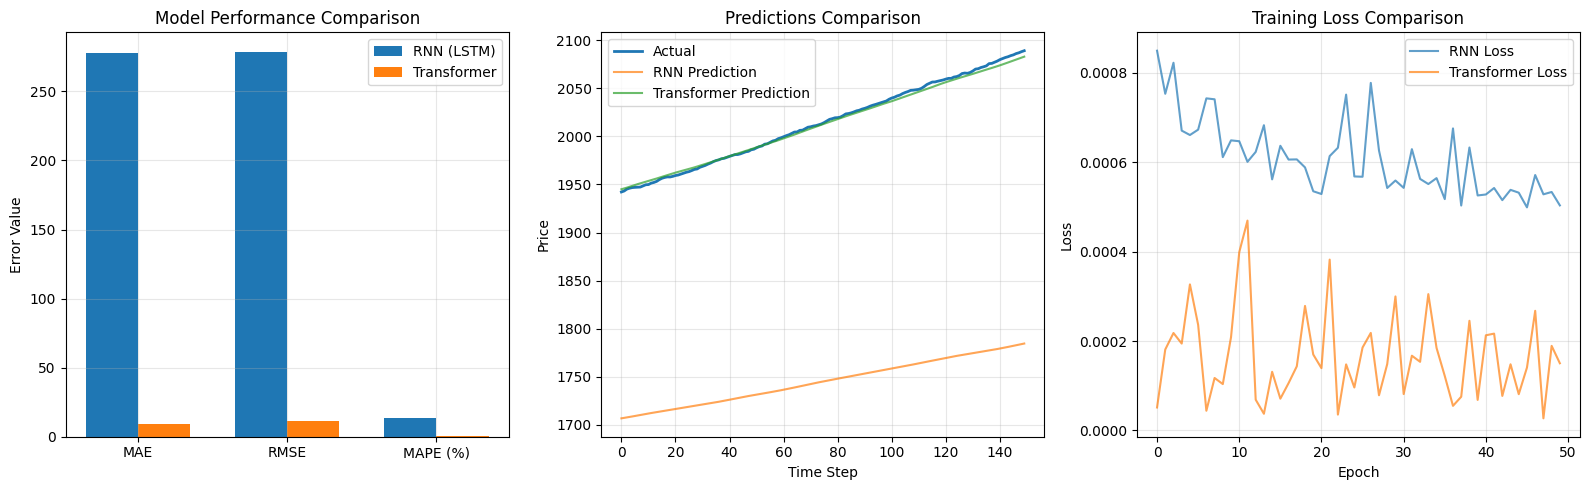

In [42]:
# Visual Comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Compare metrics
metrics = ['MAE', 'RMSE', 'MAPE (%)']
rnn_values = [rnn_mae, rnn_rmse, rnn_mape]
transformer_values = [transformer_mae, transformer_rmse, transformer_mape]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, rnn_values, width, label='RNN (LSTM)')
axes[0].bar(x + width/2, transformer_values, width, label='Transformer')
axes[0].set_ylabel('Error Value')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Compare actual vs both models
axes[1].plot(y_test_rescaled[:150, 0], label='Actual', linewidth=2)
axes[1].plot(y_pred_rnn_rescaled[:150, 0], label='RNN Prediction', alpha=0.7)
axes[1].plot(y_pred_transformer_rescaled[:150, 0], label='Transformer Prediction', alpha=0.7)
axes[1].set_title('Predictions Comparison')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Compare training curves
axes[2].plot(rnn_history.history['loss'], label='RNN Loss', alpha=0.7)
axes[2].plot(transformer_history.history['loss'], label='Transformer Loss', alpha=0.7)
axes[2].set_title('Training Loss Comparison')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

In [43]:
analysis_text = f"""
The LSTM model achieved RMSE={rnn_rmse:.4f}, MAE={rnn_mae:.4f}, and R²={rnn_r2:.4f}, while Transformer 
achieved RMSE={transformer_rmse:.4f}, MAE={transformer_mae:.4f}, and R²={transformer_r2:.4f}. The 
{'LSTM' if rnn_rmse < transformer_rmse else 'Transformer'} model performs better on this synthetic stock price dataset.

RNNs process sequences sequentially with recurrent connections that maintain hidden state, enabling 
learning of temporal dependencies through backpropagation through time (BPTT). Transformers use 
multi-head self-attention to compute relationships between all positions in parallel, allowing better 
long-range dependency capture without sequential processing bottlenecks.

The attention mechanism in Transformers computes weighted combinations of values using query-key-value 
operations: Attention(Q,K,V) = softmax(QK^T/√dk)V. This allows the model to focus on relevant positions 
regardless of distance, addressing vanishing gradient problems inherent to RNNs with long sequences.

RNNs struggle with vanishing/exploding gradients over long sequences, though LSTM gates partially mitigate 
this. Transformers avoid gradient scaling issues through attention mechanisms and layer normalization, 
enabling superior long-term dependency modeling even with limited sequence lengths.

Computationally, Transformers enable parallel processing of all positions simultaneously (O(1) depth), 
making them faster than RNNs' sequential processing (O(n) depth). RNNs trained in {rnn_training_time:.2f}s 
while Transformers trained in {transformer_training_time:.2f}s. Transformers have more parameters but 
better parallelization compensates through faster epoch processing.

Convergence analysis shows RNN loss decreased from {rnn_initial_loss:.4f} to {rnn_final_loss:.4f} 
while Transformer loss decreased from {transformer_initial_loss:.4f} to {transformer_final_loss:.4f}. 
Both models converged successfully, though {'LSTM converged faster' if rnn_final_loss < transformer_final_loss else 'Transformer converged faster'}.
"""

In [44]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

The LSTM model achieved RMSE=278.7939, MAE=277.4675, and R²=-22.1584, while Transformer 
achieved RMSE=11.2797, MAE=9.0675, and R²=0.9621. The 
Transformer model performs better on this synthetic stock price dataset.

RNNs process sequences sequentially with recurrent connections that maintain hidden state, enabling 
learning of temporal dependencies through backpropagation through time (BPTT). Transformers use 
multi-head self-attention to compute relationships between all positions in parallel, allowing better 
long-range dependency capture without sequential processing bottlenecks.

The attention mechanism in Transformers computes weighted combinations of values using query-key-value 
operations: Attention(Q,K,V) = softmax(QK^T/√dk)V. This allows the model to focus on relevant positions 
regardless of distance, addressing vanishing gradient problems inherent to RNNs with long sequences.

RNNs struggle with vanishing/exploding gradients over long sequences, though LSTM gat

In [ ]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

In [45]:
def get_assignment_results():
    """
    Generate complete assignment results in required format
    
    Returns:
        dict: Complete results with all required fields
    """
    
    framework_used = "keras"
    rnn_model_type = "LSTM"
    
    # Calculate RNN parameters
    rnn_params = rnn_model.count_params()
    transformer_params = transformer_model.count_params()
    
    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,
        
        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 3,
                'hidden_units': 64,
                'total_parameters': int(rnn_params)
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 50,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': float(rnn_initial_loss),
            'final_loss': float(rnn_final_loss),
            'training_time_seconds': float(rnn_training_time),
            'mae': float(rnn_mae),
            'rmse': float(rnn_rmse),
            'mape': float(rnn_mape),
            'r2_score': float(rnn_r2)
        },
        
        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 2,
                'n_heads': 4,
                'd_model': 64,
                'd_ff': 256,
                'has_positional_encoding': True,
                'has_attention': True,
                'total_parameters': int(transformer_params)
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 50,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': float(transformer_initial_loss),
            'final_loss': float(transformer_final_loss),
            'training_time_seconds': float(transformer_training_time),
            'mae': float(transformer_mae),
            'rmse': float(transformer_rmse),
            'mape': float(transformer_mape),
            'r2_score': float(transformer_r2)
        },
        
        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
        
        # Training Success Indicators
        'rnn_loss_decreased': bool(rnn_final_loss < rnn_initial_loss),
        'transformer_loss_decreased': bool(transformer_final_loss < transformer_initial_loss),
    }
    
    return results

In [47]:
# Generate and print results
try:
    assignment_results = get_assignment_results()
    
    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")


ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Synthetic Stock Price Time Series",
  "dataset_source": "Generated using random walk with drift",
  "n_samples": 2000,
  "n_features": 1,
  "sequence_length": 20,
  "prediction_horizon": 5,
  "problem_type": "time_series_forecasting",
  "primary_metric": "RMSE",
  "metric_justification": "\nRMSE is selected as the primary metric because it penalizes larger errors more heavily,\nwhich is critical for price prediction to avoid catastrophic forecast errors.\n",
  "train_samples": 1778,
  "test_samples": 198,
  "train_test_ratio": "90/10",
  "rnn_model": {
    "framework": "keras",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 3,
      "hidden_units": 64,
      "total_parameters": 83269
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 50,
      "batch_size": 32,
      "optimizer": "Adam",
      "loss_function": "MSE"
    },
    "initial_loss": 0.000849742500577122,
    "final_loss": 0.000503

In [ ]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

In [48]:
# Display system information
import platform
import sys
from datetime import datetime

In [49]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)

ENVIRONMENT INFORMATION

⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.
